# DISCOVERY Project 2 - Max Zhang

## Section 1: The Dataset
🏋🏻 As an avid gym enthusiast for almost 2 years, I have developed a deep passion for everything related to strength training. However, unlike the majority of gym-goers who's main objective is to build a better physique, I've gradually shifted my priority interest in **POWERLIFTING**.

Powerlifting is a form of competitive weightlifting that requires competitors to perform the Squats, the Bench Press, and the Deadlift (also known as the big-3 lifts), participants have 3 attempts for all 3 lifts (9 total attempts), and the participant with the highest total weight lifted (highest successful S,B,D combined) is the final winner.

Why did I choose powerlifting as my theme for Project 2? Well, unlike bodybuilding competitions, where judging is largely visual, subjective, and not data-driven, powerlifting is actually a sport that's largely built upon numbers. Not only are the final rankings based on numeric values, but there are a variety of other metrics: age class, weight class, Wilks Score, DOTs (these 2 are also metrics to measure performance), etc... As we data scientists know, the more measurements a dataset contains, the more potential data analysis that can be conducted👍🏻. On the other hand, there're also numerous theories I have about powerlifting that I've always wanted to validate, and I don't think there's a better way to accomplish that than using data science.

**Now for the actual dataset**:
IPF - International Powerlifting Federation, is the largest powerlifting association globally, it hosts a plethora of competitions annually on different levels, so I've decided to focus on one: the Sheffield 2024 Championships. In basketball terms, this is equivalent to the grand-finals of the playoffs. Conviniently, OpenPowerlifting.org documents comprehensive data for every competition on their websites open for public download in csv format.
It will be difficult for me to continue exploring the dataset without first knowing what it looks like, so I'm going to load it first👇🏻

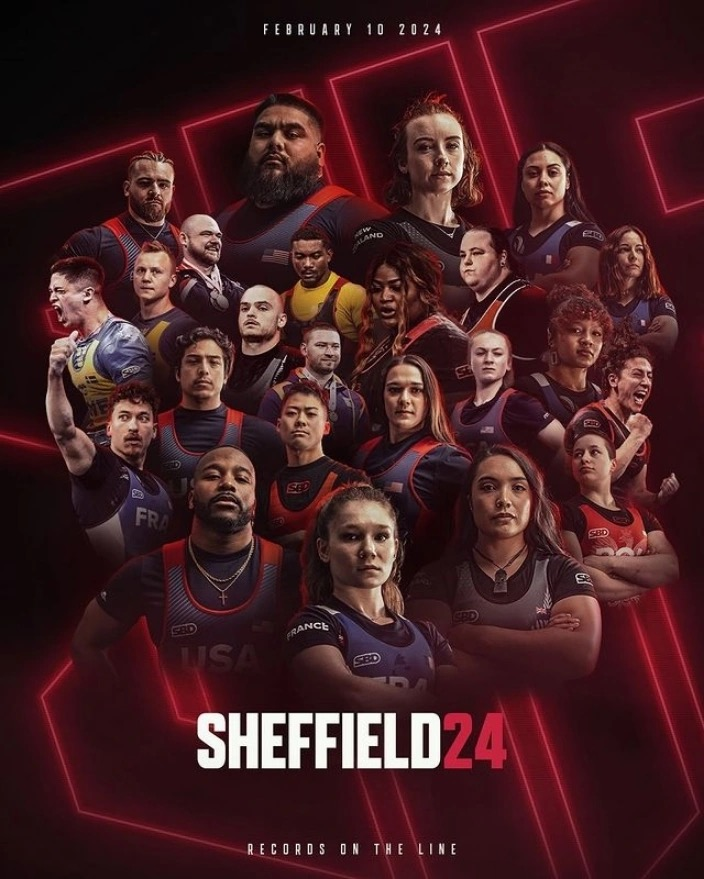

In [84]:
from IPython.display import Image
Image(filename='sheffield2024.jpg',width=500,height=500)

In [85]:
import pandas as pd
df = pd.read_csv("ipf_2401.csv")

## Section2: The Exploratory Data Analysis

Before conducting any analysis on the dataset, we should first learn and get familiar with the dataset to see what kind of meaningful analysis can be potentially performed.

In [86]:
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,Sanctioned
0,Natalie Richards #1,F,SBD,Raw,25.5,24-34,24-39,Open,56.36,NaN,...,USA,NaN,IPF,IPF,2024-02-10,UK,NaN,Sheffield,Sheffield Powerlifting Championships,Yes
1,Delaney Wallace,M,SBD,Raw,29.0,24-34,24-39,Open,82.75,NaN,...,USA,NaN,IPF,IPF,2024-02-10,UK,NaN,Sheffield,Sheffield Powerlifting Championships,Yes
2,Jesus Olivares,M,SBD,Raw,25.0,24-34,24-39,Open,186.70,NaN,...,USA,NaN,IPF,IPF,2024-02-10,UK,NaN,Sheffield,Sheffield Powerlifting Championships,Yes
3,Gavin Adin,M,SBD,Raw,25.0,24-34,24-39,Open,92.92,NaN,...,USA,NaN,IPF,IPF,2024-02-10,UK,NaN,Sheffield,Sheffield Powerlifting Championships,Yes
4,Amanda Lawrence #1,F,SBD,Raw,26.0,24-34,24-39,Open,83.51,NaN,...,USA,NaN,IPF,IPF,2024-02-10,UK,NaN,Sheffield,Sheffield Powerlifting Championships,Yes


In [87]:
df.shape

(24, 42)

A brief overview of the first 5 rows of the dataset gives us some basic knowledge of the dataset: it documents comprehensive information about all 24 lifters competing, with a whopping 42 columns. However, with careful examination, we can see that there are many columns that documents standard administrative information that are either quantitative, same for everyone (hence not significant for analysis), or simply doesn't provide meaningful insight in the context of data science.

Therefore, the next step is to cleanse and filter the dataset to only include columns useful to us.

### 2.1 Data Cleansing

In [88]:
df.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass',
       'BirthYearClass', 'Division', 'BodyweightKg', 'WeightClassKg',
       'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg',
       'Best3DeadliftKg', 'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner',
       'Goodlift', 'Tested', 'Country', 'State', 'Federation',
       'ParentFederation', 'Date', 'MeetCountry', 'MeetState', 'MeetTown',
       'MeetName', 'Sanctioned'],
      dtype='object')

In [89]:
useful_cols = ['Name','Sex','Age','BodyweightKg','Squat1Kg', 'Squat2Kg', 'Squat3Kg','Best3SquatKg',
               'Bench1Kg', 'Bench2Kg', 'Bench3Kg','Best3BenchKg','Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
               'Best3DeadliftKg', 'TotalKg', 'Place', 'Dots', 'Wilks']
df = df[useful_cols]
df

,Name,Sex,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Dots,Wilks
0,Natalie Richards #1,F,25.5,56.36,172.5,180.0,186.5,186.5,100.0,107.5,110.0,110.0,205.0,220.0,-230.0,220.0,516.5,9,596.16,604.67
1,Delaney Wallace,M,29.0,82.75,282.5,297.5,305.0,305.0,192.5,202.5,207.5,207.5,310.0,330.0,-335.0,330.0,842.5,3,569.73,563.38
2,Jesus Olivares,M,25.0,186.70,425.0,455.0,478.0,478.0,255.0,-275.0,-275.0,255.0,-380.0,380.0,-429.0,380.0,1113.0,11,565.69,595.66
3,Gavin Adin,M,25.0,92.92,305.0,331.5,337.0,337.0,192.5,205.0,-212.5,205.0,295.0,320.0,345.0,345.0,887.0,4,564.59,557.43
4,Amanda Lawrence #1,F,26.0,83.51,235.0,249.5,-253.0,249.5,122.5,130.0,135.0,135.0,242.5,262.5,-269.0,262.5,647.0,11,597.00,578.65
5,Kyota Ushiyama,M,26.5,65.81,-215.0,215.0,240.0,240.0,162.5,170.0,-172.5,170.0,280.0,-295.0,-302.5,280.0,690.0,10,541.79,543.07
6,Carl Johansson,M,23.0,73.75,252.5,265.0,270.0,270.0,177.5,-185.0,185.0,185.0,310.0,330.5,-340.5,330.5,785.5,9,569.68,566.38
7,Jade Jacob,F,22.5,56.57,177.5,186.0,188.0,188.0,95.0,100.0,-102.5,100.0,215.0,227.5,231.5,231.5,519.5,8,598.15,606.41
8,Tiffany Chapon,F,22.5,46.77,155.0,161.5,-162.5,161.5,95.0,100.0,-101.0,100.0,160.0,167.5,170.0,170.0,431.5,10,567.57,582.38
9,Sonita Muluh,F,27.0,126.63,270.0,290.5,300.5,300.5,140.0,147.5,-152.5,147.5,-245.0,250.0,260.0,260.0,708.0,6,560.13,560.79


A lot of numbers! The new DF looks much better and is ready for some EDA, briefly defining some of the variables (not all will be used):

**Squat/Bench/Deadlift 1/2/3 Kg**: The loaded weight for each of the 3 attempts in Kilograms, note that a negative number indicates a failed attempt.

**Best Squat/Bench/Deadlift Kg**: the heaviest successful lift, this is the number used to calculate the total.

**Total Kg**: Best Squat + Best Bench + Best Deadlift

**Place**: final placing is seperate for males and females, hence ranges from 1-12 for both gender groups.

**Wilks**: a formula developed by Robert Wilks which is used to measure the strength of a powerlifter against other lifters regardless of body weight. The formula calculates a coefficient by which the total weight lifted is multiplied, yielding a score that can be compared across different weight classes and genders.

**DOTS**: a newer scoring system designed to offer a more accurate normalization of powerlifting performances across different body weights and ages. The DOTS formula also uses body weight and total weight lifted but employs a different set of coefficients and polynomial adjustments.

As mentioned above, a negative number in the S/B/D column indicates a failed lift, however, these negative values will generate inaccuracies when calculating things like averages and SD, as their values mismatch the information presented. What would make more sense is by replacing them simply with the number 0, which would still indicate a failed lift but result in more accurate analysis.

In [90]:
lift_columns = ['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']
for column in lift_columns:
    df[column] = df[column].apply(lambda x: 0 if x < 0 else x)
df.head(10)

,Name,Sex,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Dots,Wilks
0,Natalie Richards #1,F,25.5,56.36,172.5,180.0,186.5,186.5,100.0,107.5,110.0,110.0,205.0,220.0,0.0,220.0,516.5,9,596.16,604.67
1,Delaney Wallace,M,29.0,82.75,282.5,297.5,305.0,305.0,192.5,202.5,207.5,207.5,310.0,330.0,0.0,330.0,842.5,3,569.73,563.38
2,Jesus Olivares,M,25.0,186.70,425.0,455.0,478.0,478.0,255.0,0.0,0.0,255.0,0.0,380.0,0.0,380.0,1113.0,11,565.69,595.66
3,Gavin Adin,M,25.0,92.92,305.0,331.5,337.0,337.0,192.5,205.0,0.0,205.0,295.0,320.0,345.0,345.0,887.0,4,564.59,557.43
4,Amanda Lawrence #1,F,26.0,83.51,235.0,249.5,0.0,249.5,122.5,130.0,135.0,135.0,242.5,262.5,0.0,262.5,647.0,11,597.00,578.65
5,Kyota Ushiyama,M,26.5,65.81,0.0,215.0,240.0,240.0,162.5,170.0,0.0,170.0,280.0,0.0,0.0,280.0,690.0,10,541.79,543.07
6,Carl Johansson,M,23.0,73.75,252.5,265.0,270.0,270.0,177.5,0.0,185.0,185.0,310.0,330.5,0.0,330.5,785.5,9,569.68,566.38
7,Jade Jacob,F,22.5,56.57,177.5,186.0,188.0,188.0,95.0,100.0,0.0,100.0,215.0,227.5,231.5,231.5,519.5,8,598.15,606.41
8,Tiffany Chapon,F,22.5,46.77,155.0,161.5,0.0,161.5,95.0,100.0,0.0,100.0,160.0,167.5,170.0,170.0,431.5,10,567.57,582.38
9,Sonita Muluh,F,27.0,126.63,270.0,290.5,300.5,300.5,140.0,147.5,0.0,147.5,0.0,250.0,260.0,260.0,708.0,6,560.13,560.79


### 2.2 Summary Statistics

In [91]:
variables = ['Age','BodyweightKg','Best3SquatKg','Best3BenchKg','Best3DeadliftKg','TotalKg','Dots','Wilks']
stats = {
    'Mean': df[variables].mean(),
    'Median': df[variables].median(),
    'Standard Deviation': df[variables].std(),
    'Minimum': df[variables].min(),
    'Maximum': df[variables].max()}

summary_stats = pd.DataFrame(stats)
summary_stats

,Mean,Median,Standard Deviation,Minimum,Maximum
Age,27.727273,27.000,4.122318,21.50,39.50
BodyweightKg,84.255000,74.675,31.559746,46.77,186.70
Best3SquatKg,267.104167,259.750,76.482732,161.50,478.00
Best3BenchKg,165.395833,163.750,49.835595,85.00,255.00
Best3DeadliftKg,282.604167,273.750,60.023180,170.00,380.00
TotalKg,715.104167,705.250,179.521888,431.50,1113.00
Dots,573.122083,569.445,21.724978,531.81,612.20
Wilks,572.758333,564.880,21.786407,532.21,606.41


By creating a dataframe consisting of summary statistics for all the main columns in the dataset, we can see that for almost every single variable, there's a very great spread as shown by the standard deviation. For example, the heaviest competitor was over 4x heavier than the lightest! The oldest competitor was also almost twice as old as the youngest. The general interpretation that can be made from this is that powerlifting, or the Sheffield 2024 Championship competition at least, is a highly inclusive event, with participants from a wide range of ages and weights being able to excel.

Comparing the 3 lifts, we can see the average best weight lifted across squad and deadlifts (260kg vs. 274kg, I rounded to whole number because that's the smallest increment allowed in context) were pretty close, with average bench press being almost 100kg lower. This is as expected and consistent with the usual propotion because deadlifts and squats as lowerbody dominant movements can use a lot more muscle compared to bench press, which solely tests a person's upper body strength. We can also see that squat was the lift that had greatest variation between different competitors.

These data provide extremely useful information that gives us direction for potential deeper analysis and trends that can be explored in later sections. But in the next section, it's useful to use some visualizations to more clearly see the distribution and relationships of the dataset!

## Section3: The Data Visualization

### 3.1 Distribution of Competitor Ages

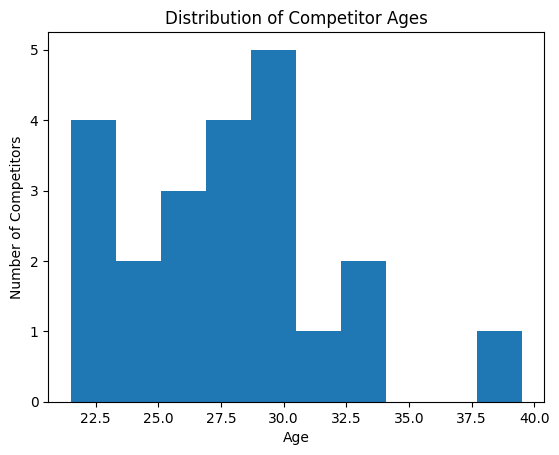

In [92]:
import matplotlib.pyplot as plt
plt.hist(df.Age)
plt.title("Distribution of Competitor Ages")
plt.xlabel("Age")
plt.ylabel("Number of Competitors")
plt.show()

<Axes: >

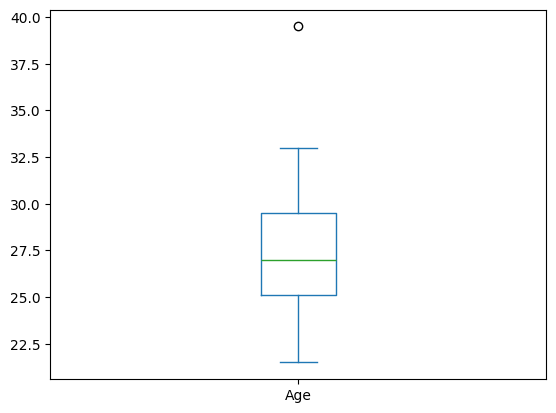

In [93]:
df.Age.plot.box()

The histogram and boxplot give us a much more straightfoward idea of the distribution of age among the 24 competitors. We can see that most competitors are in the ~10 year range between 22.5 and 33.5 years old, with 27.5-30 years old being the most frequent, or the mode age group. This is consistent with the common belief that a powerlifter peaks around before 30 years old as they spend 8-10 years maturing since adulthood.

Another interesting factor is the one and only outlier (as shown in the boxplot) - which represents **Tony Cliffe**, 40 years old as of the time this project was written. In the average dataset, an outlier is 99% negative and something we want to get rid of, but in the context of this dataset, it simply means that Tony has been in the game for so long he became a outlier compared to his peers. Nothing but respect.

### 3.2 Distribution Across the 3 Lifts

<Axes: >

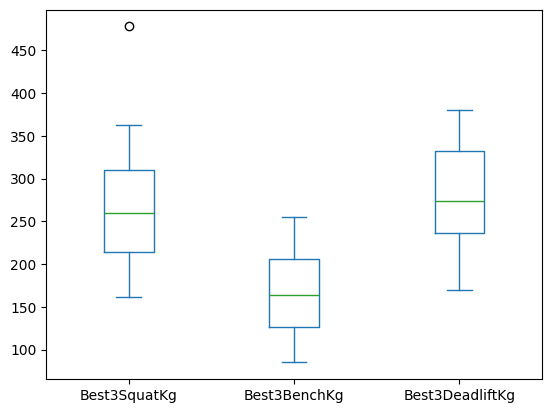

In [94]:
lifts = ['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg']
df[lifts].plot.box()

I also generated a boxplot that compares the distribution of the best Squat, Bench, and Deadlift across all competitors. By comparing the 3, we can see that it's consistent with the genral rule that any person can (usually) lift the most on deadlift, followed by squats, then bench press.

Similar to 3.1, there's also an interesting outlier in this boxplot, what's also similar is that this is also what I would call a "positive outlier", which represents the heaviest squat recorded at the competition by **Jesus Olivares**, who is also the heaviest competitor sitting at 186.7 kg bodyweight. He squatted a jaw-breaking 478KG on his 3rd attempt, breaking the all-time world record for the heaviest squat ever in the history of International Powerlifting Federation, and so much more than all his competitors' that it counted as an outlier - what a beast!

## Section 4: The Data Science

**Going into this section, I have 2 big questions that I want to find a solid answer using Data Science.**
1. One of the most popular sayings in the powerlifting community is "mass moves mass": it's common belief that, despite muscle mass, training experience, and other factors are vital, bodyweight is ultimately the most important factor determining how much weight a person is capable of lifting. Simply put, as one's bodyweight increases, the total weight lifted should also increase relatively proportionally, and I'm eager to test whether this isi true.

2. There are many "strength standard" in powerlifting, and despite they are never 100% accurate due to endless personal variations, they still give a good idea of what the average person, or the average powerlifter, is or should be able to lift. Hence, my question is: how much stronger is the average Sheffield 2024 Championships competitor compared to the average person?

### 4.1 Mass Moves Mass?

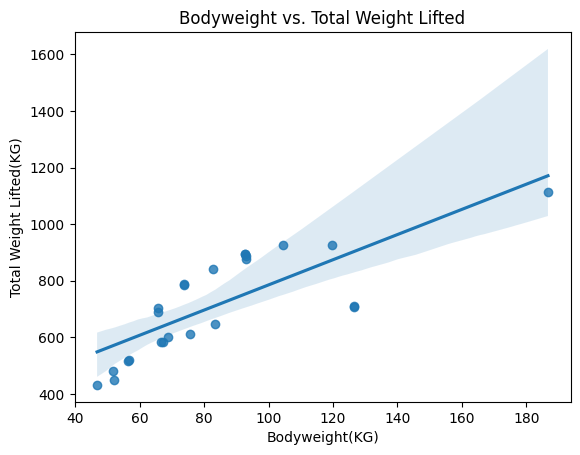

In [95]:
import seaborn as sns
sns.regplot(x='BodyweightKg', y='TotalKg', data=df)
plt.title('Bodyweight vs. Total Weight Lifted')
plt.xlabel('Bodyweight(KG)')
plt.ylabel('Total Weight Lifted(KG)')
plt.show()

In [96]:
r = df['BodyweightKg'].corr(df['TotalKg'])
r
sdy = df.TotalKg.std()
sdx = df.BodyweightKg.std()
meany = df.TotalKg.mean()
meanx = df.BodyweightKg.mean()
slope = r*(sdy/sdx)
intercept = meany - slope*meanx
print(r,slope,intercept)

0.7823643504608669 4.450337635917368 340.14096915244875


I searched online how to use Seaborn because I think the regression line features looks so much cooler than the ordinary scatter plot, but in terms of the plot itself, there's a very obvious and strong positive relationship between the bodyweight of competitors and the total weight they lifted. To make sure the greaph is not deceiving me, I also computed the correlation coefficient, slope and y-intercept of the regression line. Bodyweight and total weight lifted had a correlation coefficient of **0.7824**, right in the range to indicate a strong positive correlation.

**Interpretation**: for every extra Kilogram of bodyweight, the average Sheffield 2024 competitor is able to lift 4.45KG extra weight to their total.

Well, I guess "Mass Moves Mass" is not a myth after all, however, an important consideration is that we still can't confidently generalize the results from this analysis to the general population since it's only 100% representative for the competitors in this event. But I would argue that if the best powerlifters in the world prooves this theory too, than it's highly likely to be reflected on the general population.

In [97]:
# Just for fun I also wanted to create a function that predicts the total weight a person lifts given their bodyweight
def total_prediction(bw):
    return intercept + slope*bw

#Trying this out for my own bodyweight
total_prediction(81)

700.6183176617556

In [101]:
from sklearn.linear_model import LinearRegression
ind = df[['BodyweightKg']]
dep = df['TotalKg']
model = LinearRegression()
model.fit(ind,dep)
df['PredictedTotalKg'] = model.predict(ind)
df['Residual'] = df.TotalKg - df.PredictedTotalKg
df.sample(5)

,Name,Sex,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,Bench1Kg,Bench2Kg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Dots,Wilks,PredictedTotalKg,Residual
10,Agata Sitko,F,21.5,68.90,185.0,192.5,197.5,197.5,146.0,152.0,...,235.0,242.0,248.5,248.5,600.0,1,612.20,603.52,646.769232,-46.769232
8,Tiffany Chapon,F,22.5,46.77,155.0,161.5,0.0,161.5,95.0,100.0,...,160.0,167.5,170.0,170.0,431.5,10,567.57,582.38,548.283260,-116.783260
9,Sonita Muluh,F,27.0,126.63,270.0,290.5,300.5,300.5,140.0,147.5,...,0.0,250.0,260.0,260.0,708.0,6,560.13,560.79,903.687224,-195.687224
4,Amanda Lawrence #1,F,26.0,83.51,235.0,249.5,0.0,249.5,122.5,130.0,...,242.5,262.5,0.0,262.5,647.0,11,597.00,578.65,711.788665,-64.788665
14,Carola Garra,F,29.5,67.17,205.0,215.0,220.0,220.0,140.0,146.5,...,202.5,212.5,0.0,212.5,582.5,3,603.08,596.61,639.070148,-56.570148


I also tried using sklearn to record the predicted Total for every competitor along with the residuals. From the residuals we can see there are a lot of inconsistencies from person to person, some people's actual total were above and some were below the predicted total. We can also observe that the closer a competitor is to the end of the spectrum (in terms of bodyweight), the greater their residual. This is because for extremely light, or heavy bodyweights, their predictedtotal is still influenced and mitigated by majority of the lifters who sit at around the average bodyweight.

### 4.2 World Champion VS. Average Joe

According to Strengthlevel.com (most popular site for documenting strength standards), the average person after ~1 year of powerlifting training should be able to squat 1.5x bodyweight, bench 1x bodyweight, and deadlift 2x bodyweight. Combined, this totals to a total of 4.5x of bodyweight. Now,how does this compare to the average Sheffield 2024 competitor?

In [99]:
meanbw = df.BodyweightKg.mean()
meantotal = df.TotalKg.mean()
SHFBWtoTotal = meantotal/meanbw
SHFBWtoTotal
#On average, a competitor in the Sheffield 2024 Champaionships totals 8.48 times their own bodyweight!

8.487379581825014

In [100]:
#How much stronger than average (4.5x)?
avgBWtoTotal = 4.5
STRONG = SHFBWtoTotal / avgBWtoTotal
STRONG
print(f"The average Sheffield 2024 Competitor is {STRONG} times stronger than the average powerlifter for SBD.")

The average Sheffield 2024 Competitor is 1.8860843515166696 times stronger than the average powerlifter for SBD.


After some calculations, we found out that in terms of the squat, bench, and deadlift, sheffield competitors are almost twice as stronger as the average person with 1 year of powerlifting experience! This is very insane considering the first year is when people tend to make the most progress at the fastest rate.

However, there are so many metrics to measuring how "strong" someone is, and we cannot make a general conclusion here but instead have to narrow the scope for "strong" in context to the 3 main lifts.

## Section 5: The Summary

Throughout my project on the analysis of the Sheffield 2024 Powerlifting Championships, I've utilized a wide range of skills and procedures learned throughout DISCOVERY this semester to perform various tasks such as dataframe filtering, data cleansing, computing summary statistics,visualization of distribution of variables, and ultimately putting all together to answer more complex real-world questions using linear regression and other calculations.

By exploring the dataset in depth, I was able to extract meaningful insights from the sport of powerlifitng from a completely new perspective. For example, I knew Jesus Olivares was a monster for squatting a world-record 478KG on squats, but it was only until I generated a boxplot for all competitors and see his squat being counted as an outlier did I really put myself into context of how unbelievable that lift was. 

In the final section, I used more advanced data science skills in an attempt to solve real-world problems, namely testing whether there's a strong correlation between bodyweight of a person and the weight they are able to lift. By both manually computing linear regression and training Python itself to generate a model, I was able to succesfully conclude a strong positive correlation between the 2 variables.

In conclusion, this exploration of the Sheffield 2024 Powerlifting Championships data was not only an opportunity for me to practice holistic analyzing of a dataset, but also shed light on the remarkable capabilities and differences within powerlifting athletes.